<a href="https://colab.research.google.com/github/A-THAKUR22/AprilAssignments/blob/main/Assignment4April4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diabetes Prediction Model


Data Description


The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.
This dataset, diabetes _ 012 _ health _ indicators _ BRFSS2015.csv, is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. There is class imbalance in this dataset. This dataset has 21 feature variables
0 is for No Diabetes or only during pregnancy
1 is for Prediabetes, and
2 is for Diabetes.
Research in the field has identified the following as important risk factors for diabetes and other chronic illnesses like heart disease (not in strict order of importance):
Blood Pressure (high)
Cholesterol (high)
Smoking
Diabetes
Obesity
Age
Sex
Race
Diet
Exercise
Alcohol Consumption
BMI
Household Income
Marital Status
Sleep
Time since last checkup
Education
Health Care Coverage
Mental Health
Here, Diabetes_012 is our target variable and we will try to predict whether a person has diabetes or not based on the 21 features using bagging, specifically the Random Forest algorithm, which is an ensemble method based on bagging.




Conclusion


: The accuracy of the classifier on the validation set is approximately 0.848 or . This metric measures the overall correctness of the classifier's predictions.: The classification report provides additional metrics such as precision, recall, and F1-score for each class. Here's a breakdown:
For Class 0 (Non-diabetic):
Precision is approximately 0.86, which means that among the instances predicted as class 0,
Recall is approximately 0.98, which means that among all the actual class 0.0 instances,
, which is the harmonic mean of precision and recall.
For Class 1 (Pre-diabetic):
Precision is 0.0, which means that  This might indicate an issue with class imbalance or data quality.
Recall is 0.0, indicating that
For class 2.0 (Diabetec):
Precision is approximately 0.56, indicating that
Recall is approximately 0.16, indicating that
: The confusion matrix provides a detailed breakdown of true positives, true negatives, false positives, and false negatives for each class. It allows you to see how the classifier's predictions match with the actual classes.
For Class 0: There are 41,884 true positives (correctly predicted), 0 false positives, and 820 false negatives.
For Class 1: There are 0 true positives, 0 false positives, and 941 false negatives.
For Class 2: There are 1,132 true positives, 0 false positives, and 5,959 false negatives.
The "UndefinedMetricWarning" indicates that precision and F1-score are ill-defined for Class 1 because there are no predicted samples for this class, likely due to a lack of Class 1 instances in the validation set or an issue with class imbalance.
Overall, the model appears to perform well for Class 0 but struggles with Class 1, possibly due to data imbalance or data quality issues for that class. Further analysis and data preprocessing may be needed to improve performance on Class 1.

In [56]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [57]:
print('diabetes_012_health_indicators_BRFSS2015-diabetes_012_health_indicators_BRFSS2015.csv')

diabetes_012_health_indicators_BRFSS2015-diabetes_012_health_indicators_BRFSS2015.csv


In [58]:
#Reading the data from the csv file
Diabetes_data=pd.read_csv('diabetes_012_health_indicators_BRFSS2015 - diabetes_012_health_indicators_BRFSS2015.csv')
Diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [59]:
#Checking for null values
Diabetes_data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [60]:
#Counting the number of values in he target variable
Diabetes_data['Diabetes_012'].value_counts()

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64

In [61]:
#CHecking for number of duplicates
num_duplicates = Diabetes_data.duplicated().sum()

print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 23899


In [62]:
#Removig the duplicate values
Diabetes_data.drop_duplicates(inplace=True)

In [63]:
#Finding the correlation between the target variable and other variables
correlation=Diabetes_data.corr()['Diabetes_012'].drop('Diabetes_012')
correlation

HighBP                  0.261976
HighChol                0.203327
CholCheck               0.075701
BMI                     0.212027
Smoker                  0.046774
Stroke                  0.100276
HeartDiseaseorAttack    0.170816
PhysActivity           -0.103408
Fruits                 -0.025462
Veggies                -0.043446
HvyAlcoholConsump      -0.067164
AnyHealthcare           0.024911
NoDocbcCost             0.023568
GenHlth                 0.284881
MentHlth                0.057698
PhysHlth                0.160485
DiffWalk                0.210638
Sex                     0.032243
Age                     0.184642
Education              -0.107742
Income                 -0.147102
Name: Diabetes_012, dtype: float64

In [64]:
#Dividing the data into X and y
X=Diabetes_data.drop(columns='Diabetes_012')
y=Diabetes_data['Diabetes_012']

In [65]:
#Performing oversampling on the features and target variables
oversampler=SMOTE()
X_res, y_res = oversampler.fit_resample(X, y)


In [66]:
X_res.head(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [67]:
y_res.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Diabetes_012, dtype: int64

In [68]:
#Splitting the data into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)
randfrt=RandomForestClassifier()
randfrt.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
#Making predictions on finding who is diabetic or not
y_pred=randfrt.predict(X_test)
print(f'The predictions of the diabetic:{y_pred}')


The predictions of the diabetic:[1 2 2 ... 1 1 1]


In [73]:
#Measuring the accuracy of our model
Accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy of our model :{Accuracy}')

Accuracy of our model :0.8890847386282918


In [71]:
#Classification report of our model
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83     37783
           1       0.97      0.98      0.98     38258
           2       0.82      0.90      0.86     37992

    accuracy                           0.89    114033
   macro avg       0.89      0.89      0.89    114033
weighted avg       0.89      0.89      0.89    114033



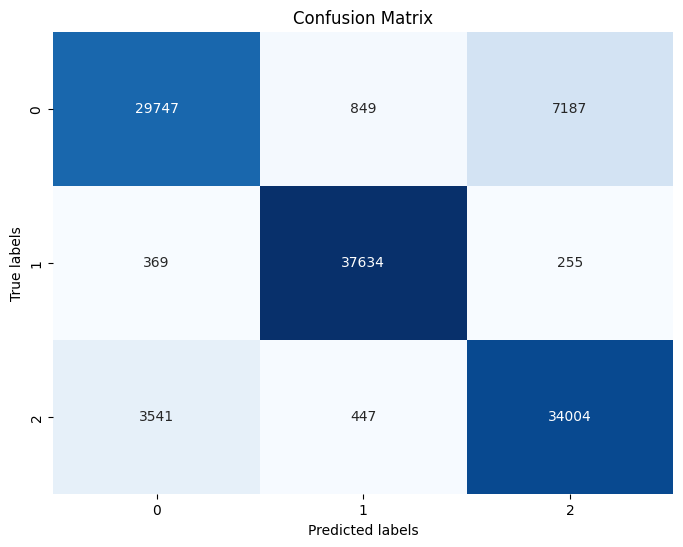

In [72]:
#Confusion matrix of the model
matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()